In [1]:
import tensorflow as tf
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
print(tf.version.VERSION)

from win32gui import FindWindow, SetForegroundWindow, GetClientRect, ClientToScreen
import pyautogui
import cv2

import tkinter as tk
from PIL import Image, ImageTk

from threading import Thread

2.1.0


In [2]:
"""
from win32gui import GetWindowText, EnumWindows
def enum_window_titles():
	#returns all open window class names
	def callback(handle, data):
		titles.append(GetWindowText(handle))
	titles = []
	EnumWindows(callback, None)
	return titles
print(enum_window_titles())
enum_window_titles()
"""

'\nfrom win32gui import GetWindowText, EnumWindows\ndef enum_window_titles():\n\t#returns all open window class names\n\tdef callback(handle, data):\n\t\ttitles.append(GetWindowText(handle))\n\ttitles = []\n\tEnumWindows(callback, None)\n\treturn titles\nprint(enum_window_titles())\nenum_window_titles()\n'

In [3]:
checkpoint_path = "C:/Users/8holz/Dokumente/GitHub/K14/Training_Protocol/Model-Color-UNET-Terrosristhunt/weights/saved_model.pb"
checkpoint_dir = os.path.dirname(checkpoint_path)

WindowClassName0 = 'Rainbow Six'
WindowClassName1 = 'J2 - Jupyter Notebook - Google Chrome'

PredImage = None

In [4]:
def screenshot(window_title=None, lenx=512, leny=512):
	if window_title:
		hwnd = FindWindow(None, window_title)
		if hwnd:
			SetForegroundWindow(hwnd)
			x, y, x1, y1 = GetClientRect(hwnd)
			x, y = ClientToScreen(hwnd, (x, y))
			x1, y1 = ClientToScreen(hwnd, (x1 - x, y1 - y))
			# x,y,x1,y1 position and size
			x += int((x1-lenx)/2)
			x1 = lenx
			y += int((y1-leny)/2)
			y1 = leny
			im = pyautogui.screenshot(region=(x, y, x1, y1))
			gray = np.array(im)
			image = np.array(gray).reshape(-1, lenx, leny, 3)
			return image
		else:
			print('Window not found!')
	else:
		im = pyautogui.screenshot()
		gray = cv2.cvtColor(np.array(im))
		image = np.array(gray).reshape(-1, lenx, leny, 3)
		return image

In [5]:
def load_K14():
    #model = create_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    #model.summary()
    model = tf.keras.models.load_model(checkpoint_dir)
    #model.summary()

    configproto = tf.compat.v1.ConfigProto() 
    configproto.gpu_options.allow_growth = True
    sess = tf.compat.v1.Session(config=configproto) 
    tf.compat.v1.keras.backend.set_session(sess)
    return model

In [6]:
model = load_K14(
)

In [7]:
def xyz(image):
    a = time.time()
    im_preds = model.predict_on_batch(image)
    print(time.time()-a)
    image = image.reshape(512, 512, 3)
    im_preds = tf.reshape(im_preds, [512, 512, 1]).numpy()
    #ImCompareGray(image, im_preds)
    return im_preds

5.54383111000061


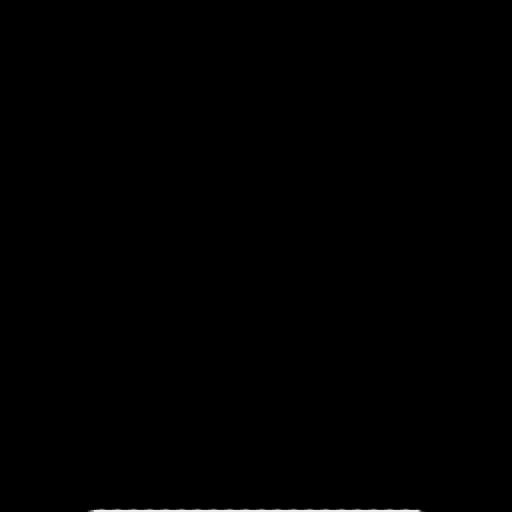

In [8]:
PredImage=xyz(screenshot(WindowClassName1))
#print(PredImage)
Image.fromarray((cv2.cvtColor(PredImage,cv2.COLOR_GRAY2RGB) * 255).astype(np.uint8))

In [9]:
ImageTesten = None
#ImageTesten = ImageTk.PhotoImage(Image.fromarray((cv2.cvtColor(PredImage,cv2.COLOR_GRAY2RGB) * 255).astype(np.uint8)))

In [10]:
class myThread(Thread):
	def __init__(self):
		Thread.__init__(self)
		None
	def run(self):
		# saves the images in the global list
		root = tk.Tk()
		canvas = tk.Canvas(root, width = 512, height = 512)
		canvas.pack()
		def recursive():
			global ImageTesten, PredImage
			ImageTesten = ImageTk.PhotoImage(Image.fromarray((cv2.cvtColor(PredImage,cv2.COLOR_GRAY2RGB) * 255).astype(np.uint8)))
			#ImageTesten = tk.PhotoImage(file=DATADIR2+random.choice(os.listdir(DATADIR2)))
			canvas.create_image(0,0, anchor=tk.NW, image=ImageTesten)
			root.after(100, recursive)
		recursive()
		root.mainloop()

In [11]:
inst = myThread()
inst.start()

In [34]:
time.sleep(5)

In [35]:
while True:
    PredImage=xyz(screenshot(WindowClassName0))
    time.sleep(0.005)

0.0049877166748046875
0.003991127014160156
0.003990650177001953
0.003989458084106445
0.006979942321777344
0.005983591079711914
0.004988193511962891
0.003987550735473633
0.005013942718505859
0.006012916564941406
0.006982088088989258
0.006982564926147461
0.004983425140380859
0.003987550735473633
0.003989219665527344
0.004987001419067383
0.00598597526550293
0.003987789154052734
0.003989696502685547
0.0017361640930175781
0.005983829498291016
0.004987955093383789
0.0019948482513427734
0.004986763000488281
0.005984306335449219
0.004990339279174805
0.003991365432739258
0.004987478256225586
0.003989458084106445
0.004984378814697266
0.005983829498291016
0.0019927024841308594
0.003988981246948242
0.0039844512939453125
0.006983518600463867
0.005983591079711914
0.0049860477447509766
0.004988193511962891
0.005982875823974609
0.004985809326171875
0.003988981246948242
0.006981849670410156
0.007979869842529297
0.003987550735473633
0.001995086669921875
0.004986763000488281
0.003988981246948242
0.003988

0.003988027572631836
0.00399017333984375
0.0059833526611328125
0.001993894577026367
0.006981611251831055
0.002992391586303711
0.00498509407043457
0.003989219665527344
0.0029909610748291016
0.002986431121826172
0.0039899349212646484
0.002991914749145508
0.004987955093383789
0.00498509407043457
0.005983114242553711
0.003986835479736328
0.0049860477447509766
0.003989458084106445
0.003987789154052734
0.002992868423461914
0.00498509407043457
0.002993345260620117
0.003987789154052734
0.003989219665527344
0.002992391586303711
0.002992868423461914
0.002994060516357422
0.002991199493408203
0.003991842269897461
0.0019948482513427734
0.002994060516357422
0.003987550735473633
0.003989696502685547
0.004990100860595703
0.003988981246948242
0.003989696502685547
0.003988504409790039
0.0029926300048828125
0.003989696502685547
0.003988504409790039
0.002992391586303711
0.002402067184448242
0.003988504409790039
0.002991914749145508
0.003988504409790039
0.003988981246948242
0.003988504409790039
0.002992391

0.0029914379119873047
0.002992391586303711
0.0039899349212646484
0.0029938220977783203
0.0029931068420410156
0.002989530563354492
0.004987001419067383
0.0029916763305664062
0.0029921531677246094
0.0029935836791992188
0.0049839019775390625
0.003988504409790039
0.00399017333984375
0.030918121337890625


error: (0, 'SetForegroundWindow', 'No error message is available')